In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# from google.colab import files
# uploaded = files.upload()
# dataset = pd.read_csv('https://drive.google.com/file/d/1-GsWubWLnh361m7FcZdcH-hIrs86RZTd/view?usp=sharing')

In [8]:
# import io
# dataset= pd.read_csv(io.BytesIO(uploaded['reviews.csv']))
dataset=pd.read_csv('reviews.csv')


In [9]:
dataset.head()

reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                           userName  \
0                          Eric Tie   
1                        john alpha   
2                       Sudhakar .S   
3  SKGflorida@bellsouth.net DAVID S   
4                     Louann Stoker   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AOh14...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/-75aK0WF...   
4  https://play-lh.googleusercontent.com/-pBcY_Z-...   

                                             content  score  thumbsUpCount  \
0                      I cannot open the app anymore      1              0   
1  I have been begging for a refund from this app...      1              0   
2  Very costly for the premium version (approx In...      1              0   
3  Used to keep me organized, but all the 2020 UP...      1              0   
4                                Dan Birthday Oct 28      1              0   

  reviewCreatedVersion                   at  \
0              5.4.0.6  2020-10-27 21:24:41   
1                  NaN  2020-10-27 14:03:28   
2                  NaN  2020-10-27 08:18:40   
3                  NaN  2020-10-26 13:28:07   
4              5.6.0.7  2020-10-26 06:10:50   

                                        replyContent            repliedAt  \
0                                                NaN                  NaN   
1  Please note that from checking our records, yo...  2020-10-27 15:05:52   
2                                                NaN                  NaN   
3  What do you find troublesome about the update?...  2020-10-26 14:58:29   
4                                                NaN                  NaN   

  sortOrder      appId  
0    newest  com.anydo  
1    newest  com.anydo  
2    newest  com.anydo  
3    newest  com.anydo  
4    newest  com.anydo

In [10]:
dataset = dataset.loc[:,['content','score']]

In [11]:
dataset.head()

content  score
0                      I cannot open the app anymore      1
1  I have been begging for a refund from this app...      1
2  Very costly for the premium version (approx In...      1
3  Used to keep me organized, but all the 2020 UP...      1
4                                Dan Birthday Oct 28      1

In [12]:
values = dataset.score.value_counts()

In [13]:
values.plot(kind='bar')

In [14]:
dataset.isnull().sum()

content    0
score      0
dtype: int64

In [15]:
def convert(x):
  if x<=2:
    return 0  #negative
  if x==3:
    return 1  #neutral
  else:
    return 2  #positive

In [16]:
dataset.score = dataset.score.apply(convert)

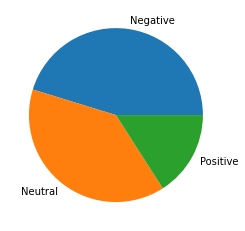

In [17]:
values = dataset.score.value_counts()
mlabels=['Negative','Neutral','Positive']
# values.plot(kind='pie')
plt.pie(values,labels=mlabels)
plt.show()

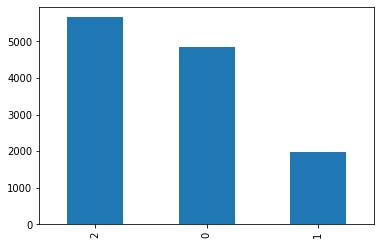

In [18]:
values.plot(kind='bar')

In [19]:
dataset.head()


content  score
0                      I cannot open the app anymore      0
1  I have been begging for a refund from this app...      0
2  Very costly for the premium version (approx In...      0
3  Used to keep me organized, but all the 2020 UP...      0
4                                Dan Birthday Oct 28      0

# Text Cleaning

In [20]:
def clean(x):
  x = x.str.lower()
  x.replace(r"https?//[a-z0-9./]",' ',inplace= True,regex=True) #filtering links
  x.replace(r'[^a-z]',' ',inplace=True,regex=True)  #filtering characters
  x.replace(r' +',' ',inplace=True,regex=True)  

  return x


In [21]:
dataset.content = clean(dataset.content)

In [22]:
dataset.head()

content  score
0                      i cannot open the app anymore      0
1  i have been begging for a refund from this app...      0
2  very costly for the premium version approx ind...      0
3  used to keep me organized but all the updates ...      0
4                                  dan birthday oct       0

In [23]:
dataset.isna().sum()

content    0
score      0
dtype: int64

In [24]:
dataset.content.replace(' ',np.nan,inplace=True)

In [25]:
dataset.dropna(subset=['content'], inplace=True)

In [26]:
dataset.tail()

content  score
12489  its ok but we can not undestad repeated task s...      2
12490  i really like the planner it helps me achieve ...      2
12492                   very useful apps you must try it      2
12493  would pay for this if there were even more add...      2
12494                                         sooow good      2

# Text preprocessing

In [27]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
dataset['content'] = dataset['content'].apply(lambda x: x.split())
dataset.head()

content  score
0               [i, cannot, open, the, app, anymore]      0
1  [i, have, been, begging, for, a, refund, from,...      0
2  [very, costly, for, the, premium, version, app...      0
3  [used, to, keep, me, organized, but, all, the,...      0
4                               [dan, birthday, oct]      0

In [29]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
dataset['content']= dataset['content'].apply(lambda x: [stemmer.stem(i) for i in x])
dataset.head()

content  score
0                [i, cannot, open, the, app, anymor]      0
1  [i, have, been, beg, for, a, refund, from, thi...      0
2  [veri, cost, for, the, premium, version, appro...      0
3  [use, to, keep, me, organ, but, all, the, upda...      0
4                               [dan, birthday, oct]      0

In [30]:
dataset.head()
dataset.tail()

content  score
12489  [it, ok, but, we, can, not, undestad, repeat, ...      2
12490  [i, realli, like, the, planner, it, help, me, ...      2
12492               [veri, use, app, you, must, tri, it]      2
12493  [would, pay, for, this, if, there, were, even,...      2
12494                                      [sooow, good]      2

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    
dataset['content'] = dataset['content'].apply(process)

In [32]:
dataset.content = dataset.content.apply(lambda y: np.nan if len(y)==0 else y)
dataset.dropna(subset=['content'], inplace=True)
dataset.head()
dataset.tail()

content  score
12489               [shedul, undestad, task, repeat, ok]      2
12490  [task, doubl, avenu, thumb, planner, help, goa...      2
12492                        [must, app, veri, tri, use]      2
12493  [even, develop, wish, pay, love, would, updat,...      2
12494                                      [good, sooow]      2

In [33]:
from wordcloud import WordCloud
from collections import Counter 

words = []
for line in dataset['content']: 
 words.extend(line)
 
wordfreq = Counter(words)
wordcloud = WordCloud(
 background_color='black',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
dataset['content']= dataset['content'].apply(string)
dataset.head()  

content  score
0                             anymor app open cannot      0
1                  repli nobodi app month beg refund      0
2  year veri use cost list microsoft premium bett...      0
3  continu ur use keep justifi enuf thing make sa...      0
4                                   oct birthday dan      0

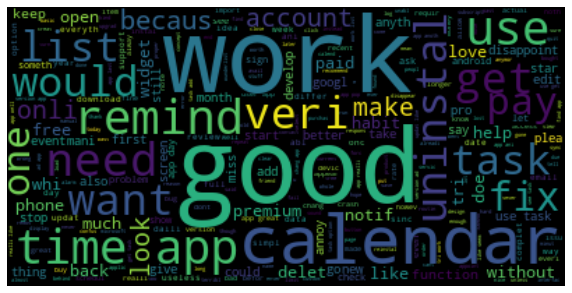

In [35]:
negative = [r for r in dataset['content'][dataset['score']==0]]
neg=''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

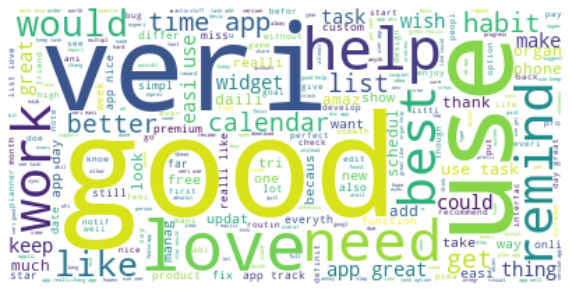

In [36]:
positive= [r for r in dataset['content'][dataset['score']==2]]
pos=''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

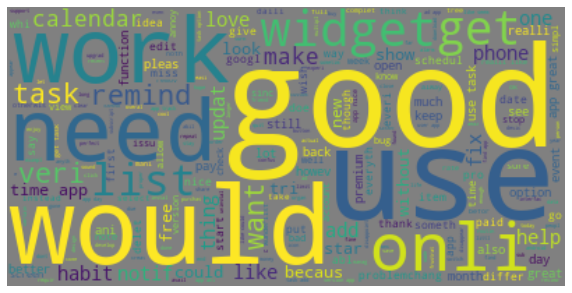

In [37]:
neutral= [r for r in dataset['content'][dataset['score']==1]]
neu=''.join(neutral)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='grey',
    max_words=2000,
    stopwords=stopwords
   ).generate(neu)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Feature engineering 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dataset['content'], dataset['score'], test_size = 0.2, random_state = 42)

print("training set :",X_train.shape,y_train.shape)
print("testing set :",X_test.shape,y_test.shape)


training set : (9905,) (9905,)
testing set : (2477,) (2477,)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformertfdif = TfidfTransformer(norm='l2',sublinear_tf=True)

In [40]:
x_train_counts=count_vect.fit_transform(X_train)
x_train=transformertfdif.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train.shape)

(9905, 6532)
(9905, 6532)


In [41]:
x_test_counts = count_vect.transform(X_test)
x_test=transformertfdif.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test.shape)

(2477, 6532)
(2477, 6532)


# Logistic Regression Model

In [42]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    plt.figure()
    sns.heatmap(matrix, annot=True,cmap='Blues')
    class_names = ['Negative','Neutral','Positive']
    tick_marks = np.arange(len(class_names))+0.5
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('Confusion Matrix\n')
    plt.show()

Training accuracy:  0.8207975769813226
Test accuracy:  0.699232943076302

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       936
           1       0.29      0.09      0.13       402
           2       0.76      0.82      0.79      1139

    accuracy                           0.70      2477
   macro avg       0.58      0.57      0.55      2477
weighted avg       0.65      0.70      0.66      2477



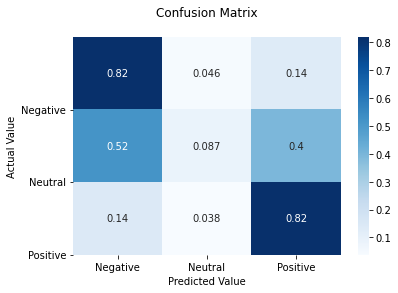

In [43]:
LR_model = LogisticRegression(max_iter=10000,C = 2, n_jobs=-1)
LR_model.fit(x_train, y_train)
print("Training accuracy: ",LR_model.score(x_train,y_train))
y_predict_lr = LR_model.predict(x_test)
print("Test accuracy: ",accuracy_score(y_test, y_predict_lr))
print()
model_Evaluate(LR_model)

# Multinomial Naive Bayes Model

Training accuracy:  0.7512367491166078
Test accuraccy:  0.7101332256762213

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       936
           1       0.00      0.00      0.00       402
           2       0.74      0.86      0.80      1139

    accuracy                           0.71      2477
   macro avg       0.47      0.56      0.51      2477
weighted avg       0.60      0.71      0.65      2477



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


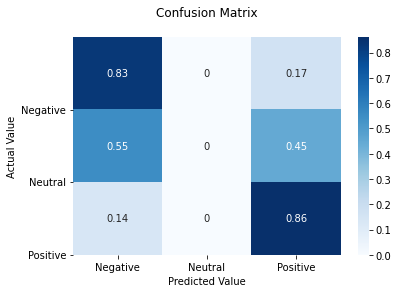

In [44]:
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)
print("Training accuracy: ",NB_model.score(x_train,y_train))
y_predict_nb = NB_model.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_nb))
print()
model_Evaluate(NB_model)


Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier(n_estimators=300)
randomForest.fit(x_train,y_train)

print("Training accuracy: ",randomForest.score(x_train,y_train))
y_predict_rf= randomForest.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_rf))
print()
model_Evaluate(randomForest)

Training accuracy:  0.9791014639071176
Test accuraccy:  0.7040775131207105

              precision    recall  f1-score   support

           0       0.65      0.85      0.74       936
           1       0.43      0.01      0.03       402
           2       0.76      0.83      0.79      1139

    accuracy                           0.70      2477
   macro avg       0.61      0.56      0.52      2477
weighted avg       0.66      0.70      0.65      2477



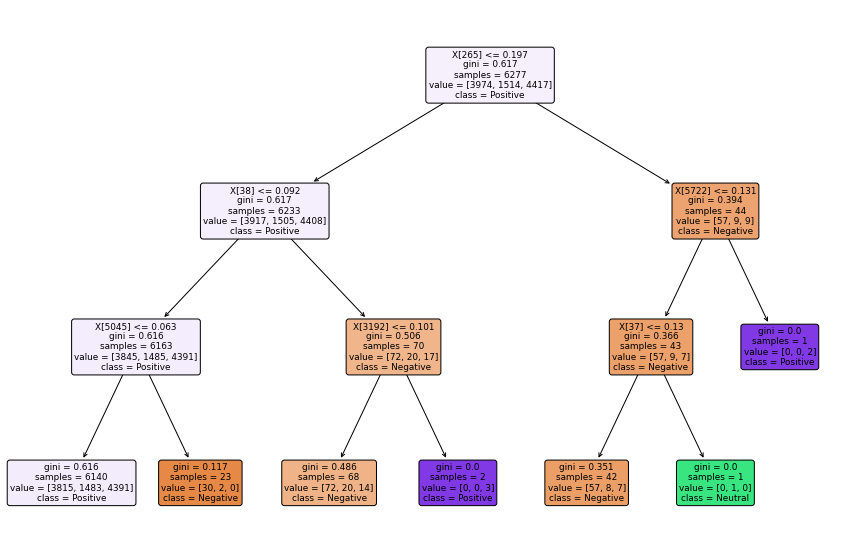

In [70]:
from sklearn.tree import plot_tree
randomForest2=RandomForestClassifier(max_depth=3,n_estimators=300)
randomForest2.fit(x_train,y_train)
cn=['Negative', 'Neutral', 'Positive']

fig = plt.figure(figsize=(15, 10))
plot_tree(randomForest2.estimators_[0], 
          class_names=cn, 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('figure_name.png')

Bernoulli Naive Bayes

Training accuracy:  0.6982332155477032
Test accuraccy:  0.645135244247073

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       936
           1       0.26      0.10      0.15       402
           2       0.65      0.87      0.74      1139

    accuracy                           0.65      2477
   macro avg       0.54      0.53      0.52      2477
weighted avg       0.61      0.65      0.61      2477



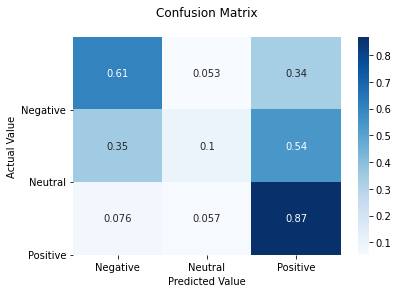

In [46]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


print("Training accuracy: ",BNBmodel.score(x_train,y_train))
y_predict_bnb= BNBmodel.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_bnb))
print()
model_Evaluate(BNBmodel)


SVC

Training accuracy:  0.8595658758202928
Test accuraccy:  0.6855066612838111

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       936
           1       0.25      0.10      0.14       402
           2       0.76      0.81      0.78      1139

    accuracy                           0.69      2477
   macro avg       0.56      0.57      0.55      2477
weighted avg       0.64      0.69      0.66      2477



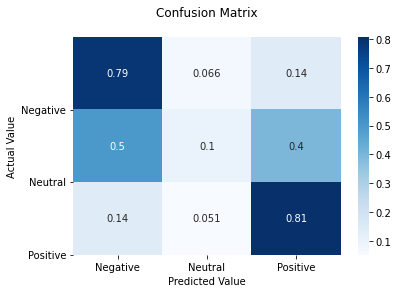

In [47]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

print("Training accuracy: ",SVCmodel.score(x_train,y_train))
y_predict_svc= SVCmodel.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_svc))
print()
model_Evaluate(SVCmodel)


Decision Tree

Training accuracy:  0.9791014639071176
Test accuraccy:  0.6096083972547437

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       936
           1       0.23      0.15      0.18       402
           2       0.67      0.75      0.71      1139

    accuracy                           0.61      2477
   macro avg       0.51      0.51      0.51      2477
weighted avg       0.59      0.61      0.60      2477



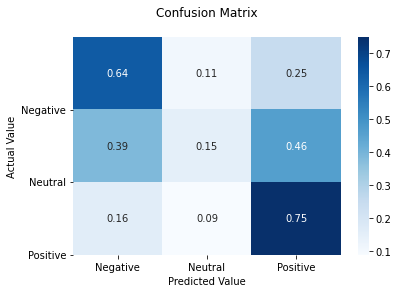

In [48]:
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier(random_state=0)
DTmodel.fit(x_train, y_train)

print("Training accuracy: ",DTmodel.score(x_train,y_train))
y_predict_svc= DTmodel.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_svc))
print()
model_Evaluate(DTmodel)

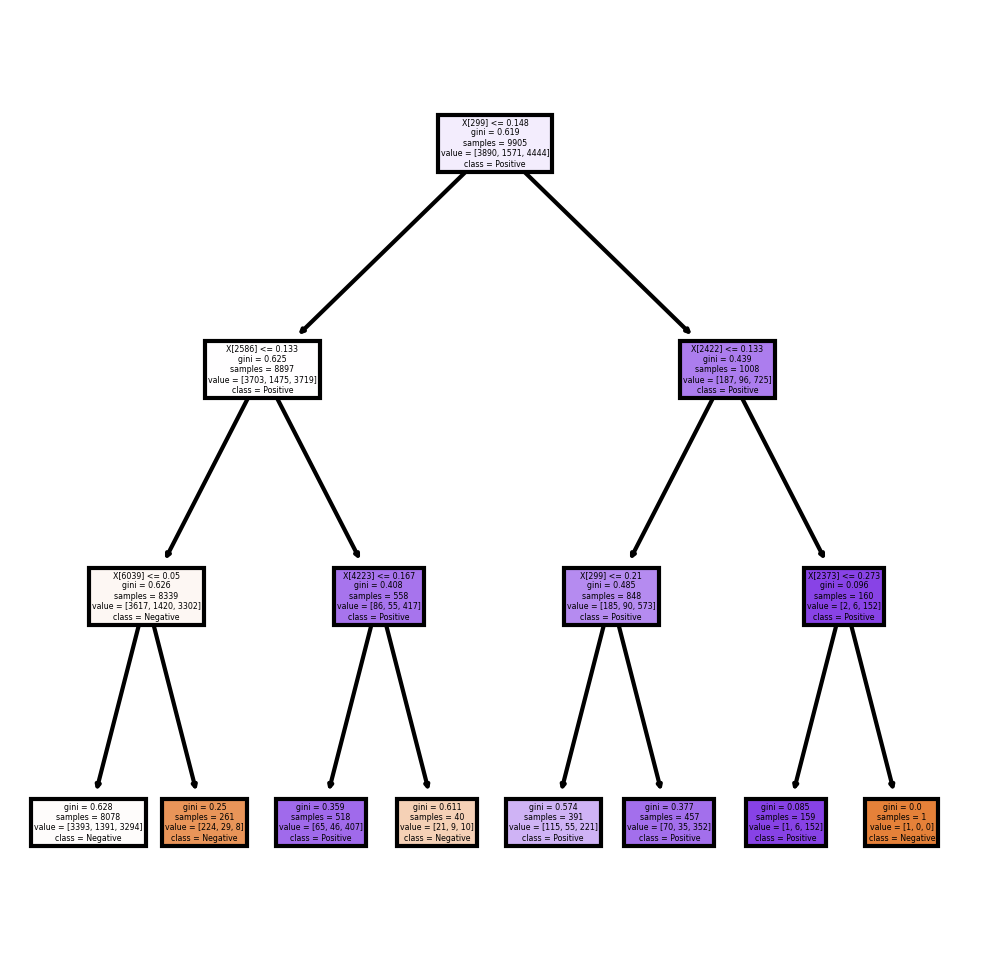

In [66]:
from sklearn import tree
DTmodel2=DecisionTreeClassifier(max_depth = 3,random_state=0)
DTmodel2.fit(x_train, y_train)
DTmodel2.predict(x_test)
cn=['Negative', 'Neutral', 'Positive']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DTmodel2,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
# tree.plot_tree(DTmodel2);

In [67]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(DTmodel, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(twitterdiabetes.png')
# Image(graph.create_png())

KNN Classifier

Training accuracy:  0.8169611307420495
Test accuraccy:  0.5478401291885345

              precision    recall  f1-score   support

           0       0.47      0.94      0.63       936
           1       0.36      0.03      0.06       402
           2       0.82      0.41      0.54      1139

    accuracy                           0.55      2477
   macro avg       0.55      0.46      0.41      2477
weighted avg       0.61      0.55      0.50      2477



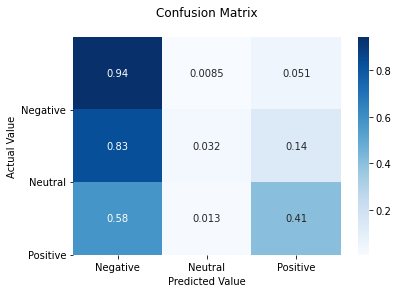

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel= KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(x_train, y_train)

print("Training accuracy: ",KNNmodel.score(x_train,y_train))
y_predict_svc=KNNmodel.predict(x_test)
print("Test accuraccy: ",accuracy_score(y_test, y_predict_svc))
print()
model_Evaluate(KNNmodel)

Logistic Regression

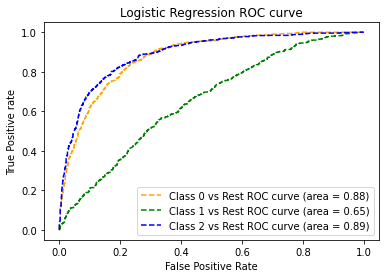

In [51]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,roc_auc_score

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob_lr= clf.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_lr[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

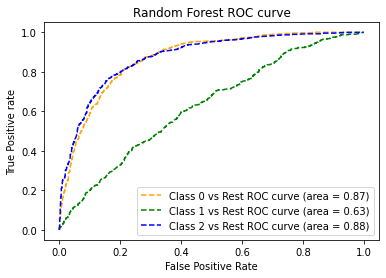

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score

pred_prob_rf= randomForest.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_rf[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [53]:
pred_prob_knn= KNNmodel.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_knn[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

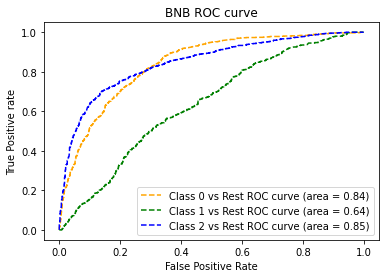

In [55]:
pred_prob_bnb= BNBmodel.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_bnb[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('BNB ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

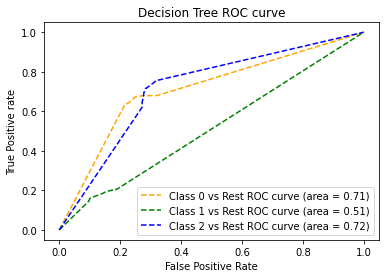

In [56]:
pred_prob_dt= DTmodel.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('Decision Tree ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

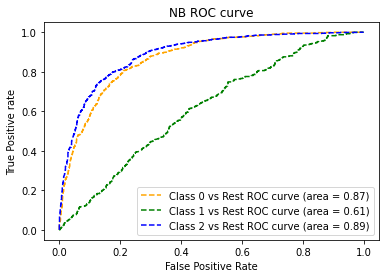

In [58]:
pred_prob_nb= NB_model.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_nb[:,i], pos_label=i)
    roc_auc[i]= auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('NB ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [59]:

print("ROC-AUC score for logistic regression: " + str(roc_auc_score(y_test,pred_prob_lr,multi_class="ovr")))
print("ROC-AUC score for Random Forest: " + str(roc_auc_score(y_test,pred_prob_rf,multi_class="ovr")))
print("ROC-AUC score for KNN: " + str(roc_auc_score(y_test,pred_prob_knn,multi_class="ovr")))
print("ROC-AUC score for Bernoulli: " + str(roc_auc_score(y_test,pred_prob_bnb,multi_class="ovr")))
print("ROC-AUC score for Decision Tree: " + str(roc_auc_score(y_test,pred_prob_dt,multi_class="ovr")))
print("ROC-AUC score for multinomial bayes: " + str(roc_auc_score(y_test,pred_prob_nb,multi_class="ovr")))

ROC-AUC score for logistic regression: 0.8072403397448467
ROC-AUC score for Random Forest: 0.7918246158622196
ROC-AUC score for KNN: 0.6417601640499637
ROC-AUC score for Bernoulli: 0.7743951866677826
ROC-AUC score for Decision Tree: 0.6460793482929403
ROC-AUC score for multinomial bayes: 0.7913196784609582
